lambda x, y, t: y - (x[0] + x[1]*t[0] + x[2]*t[1] + x[3]*t[0]**2 + x[4]*t[0]*t[1] + x[5]*t[1]**2 + x[6]*t[0]**3 + x[7]*t[0]**2*t[1] + x[8]*t[0]*t[1]**2 + x[9]*t[1]**3 + x[10]*t[0]**4 + x[11]*t[0]**3*t[1] + x[12]*t[0]**2*t[1]**2 + x[13]*t[0]*t[1]**3 + x[14]*t[1]**4)
numpy time:0.0019145011901855469, residual:[ 57.78786225]
scipy time:0.20354795455932617, residual:28.893931126863812


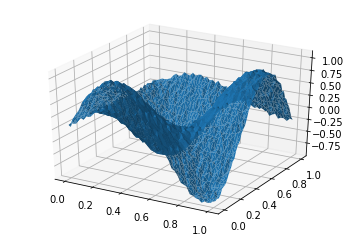

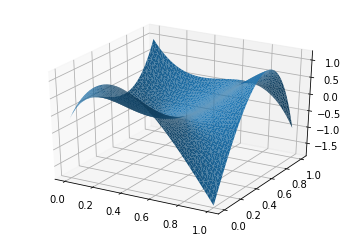

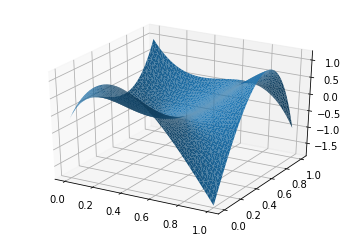

In [21]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
import psf_interpolation_utils as utils
import tf_pixelwise_interpolation as tf_pixelwise
from imp import reload
from time import time

reload(utils)




fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(0, 1, 50)
y = np.linspace(0, 1, 50)
X, Y = np.meshgrid(x, y, copy=False)
# Z = X**2 + Y**2 + np.random.rand(*X.shape)*0.01
# Z = X**2 + Y**2
Z = np.sin(5*X)*np.cos(5*Y) + np.random.rand(*X.shape)*0.1

X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()
ax.plot_trisurf(X, Y, Z)

order = 4
t0=time()
coeff, r = utils.poly_fit(X, Y, Z, order)
t1=time()
coeff_sci, r_sci = utils.poly_scipy_fit(X, Y, Z, order)
t2=time()
pred_Z = utils.poly_val_all(X, Y, coeff, order)
pred_sci_Z = utils.poly_val_all(X, Y, coeff_sci, order)



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X, Y, pred_Z)
print('numpy time:{}, residual:{}'.format(t1-t0, r))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X, Y, pred_sci_Z)
print('scipy time:{}, residual:{}'.format(t2-t1, r_sci))

plt.show()

Step 0: loss = 0.00000 (0.023 sec)
Step 100: loss = 0.00001 (0.000 sec)
Step 200: loss = 0.00001 (0.000 sec)
Step 300: loss = 0.00001 (0.000 sec)
Step 400: loss = 0.00001 (0.000 sec)
Step 500: loss = 0.00001 (0.000 sec)
Step 600: loss = 0.00001 (0.000 sec)
Step 700: loss = 0.00001 (0.000 sec)
Step 800: loss = 0.00001 (0.000 sec)
Step 900: loss = 0.00000 (0.001 sec)
Training Data Eval:
  Num examples: 2000  Total loss: 0.000127783  Mean loss @ 1: 0.000000064
Validation Data Eval:
  Num examples: 2000  Total loss: 0.000178303  Mean loss @ 1: 0.000000089
Step 1000: loss = 0.00001 (0.001 sec)
Step 1100: loss = 0.00001 (0.000 sec)
Step 1200: loss = 0.00001 (0.000 sec)
Step 1300: loss = 0.00001 (0.000 sec)
Step 1400: loss = 0.00001 (0.000 sec)
Step 1500: loss = 0.00001 (0.000 sec)
Step 1600: loss = 0.00001 (0.000 sec)
Step 1700: loss = 0.00001 (0.000 sec)
Step 1800: loss = 0.00000 (0.000 sec)
Step 1900: loss = 0.00002 (0.000 sec)
Training Data Eval:
  Num examples: 2000  Total loss: 0.000123

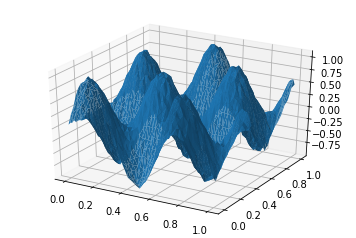

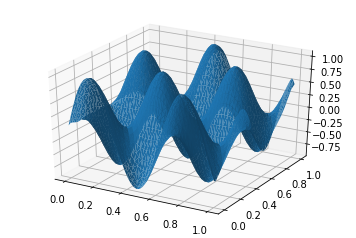

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
import psf_interpolation_utils as utils
import psf_interpolation as psf_interpolation
import tf_pixelwise_interpolation as tf_pixelwise

my_psf = psf_interpolation.PSF_interpolation()
my_psf.interpolate(method='tf_pixelwise', learning_rate=0.01, hidden1=3, hidden2=6, pixel_num=0)



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(0, 1, 50)
y = np.linspace(0, 1, 50)
X, Y = np.meshgrid(x, y, copy=False)
# Z = X**2 + Y**2 + np.random.rand(*X.shape)*0.01
# Z = X**2 + Y**2
Z = np.sin(10*X)*np.cos(10*Y) + np.random.rand(*X.shape)*0.1

X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()
order = 20
coeff, r = utils.poly_fit(X, Y, Z, order)
pred_Z = utils.poly_val_all(X, Y, coeff, order)

ax.plot_trisurf(X, Y, Z)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X, Y, pred_Z)
print(r)
plt.show()

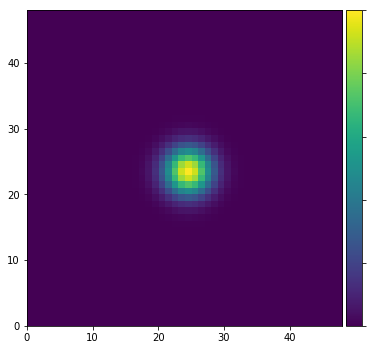

In [4]:
import psf_interpolation_utils as utils
import numpy as np
[psf_mesh_x, psf_mesh_y] = np.mgrid[0:48, 0:48]
psf_mesh_x = psf_mesh_x - 24
psf_mesh_y = psf_mesh_y - 24
utils.plot_stamp(stamp_data=np.exp(-(psf_mesh_x**2+psf_mesh_y**2)/(2*2.5**2)))

In [2]:
import numpy as np
b=np.array([[1,2],[3,4]])
a=[b,2*(b.copy()),3*(b.copy()),4*(b.copy())]
a=np.array(a)
print(a-b)

[[[ 0  0]
  [ 0  0]]

 [[ 1  2]
  [ 3  4]]

 [[ 2  4]
  [ 6  8]]

 [[ 3  6]
  [ 9 12]]]
